# Introduction

## Curse of dimensionality

The term *curse of dimensionality* was coined by [Richard Bellman](https://en.wikipedia.org/wiki/Richard_E._Bellman) to denote the difficulty of manipulating data sets that have a very large number of attributes, or that is, they have a high dimensionality.

In the context of ML, the curse of dimensionality, also known as the *Hughes phenomenon* states that, in a dataset that contains a fixed amount of samples, say 1000, the more dimensions the samples have, the more difficult is to generate an ML model.

For example, if the samples are two-dimensional, it is easy to train a decent predictive model with 1000 samples. However, when each sample contains 500 dimensions, then 1000 samples are not enough to train a decent model. This is because, to train a good predictive model, an ML algorithm has to be presented with a reasonable number of possible combinations of attribute values, in order to properly capture the patterns underlying the data. With more dimensions (i.e., more predictive attributes), there are **exponentially** more possible combinations and therefore more samples are needed. The following figure illustrates this: the amount of training data needed to cover the attribute space grows exponentially with the number of dimensions.

<center>

![alt text](https://images.deepai.org/glossary-terms/curse-of-dimensionality-61461.jpg)

</center>

As the dimensionality of a dataset increases, the performance of the prediction model increases until the ideal number of attributes is reached. However, further increasing the dimensionality without increasing the number of training samples results in a decrease in the predictive performance of the generated model.

## Dimensionality reduction and attribute selection

The choice of attributes (features) used to train a machine learning model has a great influence on the performance that can be achieved.

Example (2D to 1D):

![alt text](https://shapeofdata.files.wordpress.com/2013/04/projection.png)

Example (3D to 2D):

![alt text](https://i.stack.imgur.com/9ETLr.png)

If the original data set contains a very large number of attributes, it is possible that there are dependencies between them. As a result, there will be more dimensions in the attribute space than the minimum required to perform any ML task. In addition, in classification or regression tasks, it is possible that there are attributes that are not relevant to infer the value of the target attribute.

In the context described above, we can consider applying techniques of *dimensionality reduction* or *feature selection* on the original data set. The purpose of these families of techniques is to reduce the number of attributes to be used when adjusting some ML model.

The difference between dimensionality reduction and attribute selection is that the set of attributes resulting from the application of the latter is a subset of the original set of attributes, while the set of attributes produced by dimensionality reduction does not need to be a subset (for example, example, PCA reduces dimensionality by producing new features which are linear combinations of the original features, and then discarding the less important ones). In this way, we can understand the attribute selection as a particular case of dimensionality reduction. In any case, both DR and AS can be used during the pre-processing phase for later application of a learning algorithm (i.e., fitting some ML model).

# Dimensionality reduction

DR's main objective is to compact a set of data, preserving most of the significant information. This compression corresponds to reducing the dimensions of the data set with minimal loss of information.

Compression facilitates the process of understanding the data, as it is expected that the reduced data representation captures the dominant sources of variation more efficiently.

The goal is to discover the "hidden variables" that can successfully expose the underlying structure of the data.

The desired result is to design an attribute space in a smaller subspace that represents the data properly. A possible application would be in a classification task, in which we want to reduce the computational costs and the classification error, reducing the number of dimensions of the attribute space.


## Mean vector

Consider a data set consisting of $m$ samples, each one an $n$-dimensional vector. That is, the corresponding data matrix $X$ contains in its rows $m$ vector columns (each with $n$ components) of the data set.

Structure of a data matrix $X$:

$$
\mathbf{X} = {
  \begin{bmatrix}
    \mathbf{x}^{(1)}\\
    \vdots \\
    \mathbf{x}^{(m)}
  \end{bmatrix}}^T = 
  {\begin{bmatrix} 
    (\mathbf{x}^{(1)})^T \\ 
    \vdots \\ 
    (\mathbf{x}^{(m)})^T 
  \end{bmatrix}}
$$

Another way to interpret the above statement is to say that a data matrix $X$ contain the $m$ column vector as rows, and each column vector has $n$ components.

$$
\mathbf{X} = {\begin{bmatrix} (\mathbf{x}^{(1)})^T \\ \vdots \\ (\mathbf{x}^{(m)})^T \end{bmatrix}}
$$

We denote the entry in the $i$-th row and $j$-th column of $X$ by $x^{(i)}_j$. We define $\mu_j$, the **mean** of the $j$-th column (feature) of $X$ as the following:

$$
{\mu_j = \displaystyle {\frac {1}{m}}\sum _{i=1}^{m}x_{j}^{(i)} } 
$$

Notice that $\mu_j \in \Re$ when the data matrix presents just one column. We can also think of $\mathbf{\mu} \in \Re^n$, the **sample mean vector** of a data matrix with $n$ columns. The sample mean vector contains the average of the observations for each variable, and is written as the following:

$$
\mathbf{\mu} ={\frac{1}{m}}\sum _{i=1}^{m} \mathbf{x}^{(i)} = {\begin{bmatrix}{\mu}_{1}\\\vdots \\{\mu}_{j}\\\vdots \\{\mu}_{n}\end{bmatrix}}
$$

A data matrix is ​​said to be *centered* if all of its points (data vectors) have been transformed to subtract the corresponding mean vector. See the following example. Notice that centering the points in the original data matrix results in them being just translated; the pairwise distances between them remain the same after the translation.



In [1]:
import numpy as np

X = np.array([[0,0],[1/2,1/2],[0,1],[1,0],[1,1]])
print('Original data matrix:\n', X)

X_centered = X - X.mean(axis=0)
print('Centered data matrix:\n', X_centered)

Original data matrix:
 [[0.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]]
Centered data matrix:
 [[-0.5 -0.5]
 [ 0.   0. ]
 [-0.5  0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]]


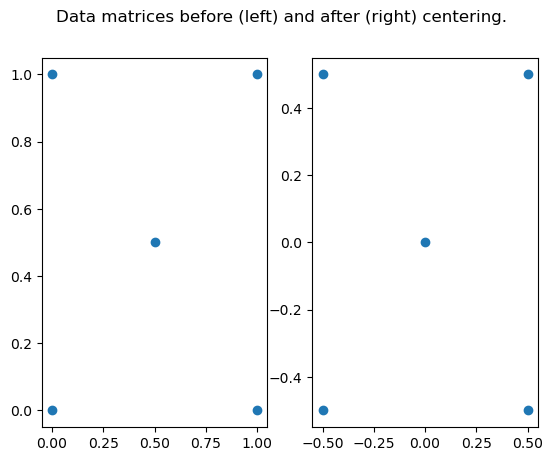

In [2]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Data matrices before (left) and after (right) centering.')

# plot data
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X_centered[:, 0], X_centered[:, 1])

## Variance and covariance

Given two random variable $x$ and $y$, the covariance between $x$ and $y$ as follows:

$$
\mathrm{cov}(x,y)=\mathbf{E}{
  \begin{bmatrix}
  (x-\mathbf{\mu}_x)(y-\mathbf{\mu}_y)
  \end{bmatrix}}=\mathbf{E} 
  {\begin{bmatrix}x y\end{bmatrix}}-\mathbf{\mu}_{x}\mathbf{\mu}_{y}
$$

In the above expression, $\mu_x$ and $\mu_y$ are the means of $x$ and $y$, respectively, and $\mathbf{E}[\cdot]$ denotes the expected value.

In the context of a data matrix, covariance measures the linear relationship (if any) between a pair of features. For example, suppose a data matrix has two features:

* $x_j = \text{number of hours of study}$
* $x_k = \text{final grade obtained}$ 

The value $\mathrm{cov}(x_j,x_k)$ tells us whether those two variables are related, and, if so, what is the direction of such relationship.

The covariance between a random variable and itself is the *variance* of this variable. This gives us a notion of the dispersion of the values of this variable around its mean. That is, variance is a measure of the deviation (from the mean) for points in one dimension. For example, we can compute the variance of the heights of a group of individuals to see how dispersed these values are.



## Covariance matrix

It is possible to organize the values of covariances between variables (features) of a $n$-dimensional data matrix into another matrix.The so called *covariance matrix* of a data matrix $X$ has order $n \times n$. Given two attributes $x_j$ and $x_k$ in $X$, the entry $(j, k)$ in this matrix is ​​defined by the following:

$$
\Sigma_{jk} = \mathrm{cov}(x_j,x_k)
$$

Every covariance matrix is ​​symmetric with respect to the main diagonal, since $\text{cov}(x_j,x_k) = \text{cov}(x_k,x_j)$. The values ​​on the main diagonal of a covariance matrix correspond to the sample variances of each of the $n$ variables (features).

Also, every covariance matrix is [positive semi-definite](https://en.wikipedia.org/wiki/Positive_semi-definite_matrix).

In a machine learning context, we will be working with [estimates of the covaviance matrix](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices), since we are going to build an approximation of the true covariance matriz considering only the samples from the data matrix $X$.

$$
\Sigma_{jk} = {\frac{1}{m-1}}\sum _{i=1}^{m}\left(x^{(i)}_{j}-{\mu}_{j}\right)\left(x^{(i)}_{k}-{\mu}_{k}\right) 
$$

The covariance matrix can be computed in a vectorized way:

$$
\Sigma =\frac{1}{m-1} X^T \, X
$$

In the expression above, $X$ is the (*already centered*) data matrix.

The code cell below shows how the sample covariance matrix of a data matrix $X$ can be computed.

In [3]:
X = np.array([[0, 2], [1, 1], [2, 0]])
m =3
print(X)

X_centered = X - X.mean(axis=0)

print('centered:')
print(X_centered)

print('cov:')
temp = X_centered.T.dot(X_centered)
temp = temp / (m-1)
print(temp)

from sklearn.covariance import EmpiricalCovariance

cov = EmpiricalCovariance().fit(temp)

print('Estimate of the covariance matrix:\n', cov.covariance_)

[[0 2]
 [1 1]
 [2 0]]
centered:
[[-1.  1.]
 [ 0.  0.]
 [ 1. -1.]]
cov:
[[ 1. -1.]
 [-1.  1.]]
Estimate of the covariance matrix:
 [[ 1. -1.]
 [-1.  1.]]


The code cell below ilustrates the difference between the real covariance matrix and the sample covariance matrix, for the special case of two normally distributed variables. Consider that the covariance matrix for these two variables is the following:

$$ 
	\Sigma = \begin{bmatrix} \text{cov}(x,x) & \text{cov}(x,y) \\[0.3em] \text{cov}(y,x) & \text{cov}(y,y) \\[0.3em] \end{bmatrix}  = \begin{bmatrix} 0.8 & 0.3 \\[0.3em] 0.3 & 0.4 \\[0.3em] \end{bmatrix}
$$

The code cell below first builds a sample of 500 pairs of those two normally distributed random variables. The result is a data matrix with $n=2$ features and $m = 500$ examples. In the generated plot, notice how these two variables are somewhat positively correlated. 

After ploting the points, the class `EmpiricalCovariance` of Scikit-Learn is used to build an estimate of the covariance matriz using these points. By comparing the real covariance matrix and its estimate, you should conclude that the latter is a good approximation of the former. 

Real covariance matrix:
 [[0.8 0.3]
 [0.3 0.4]]


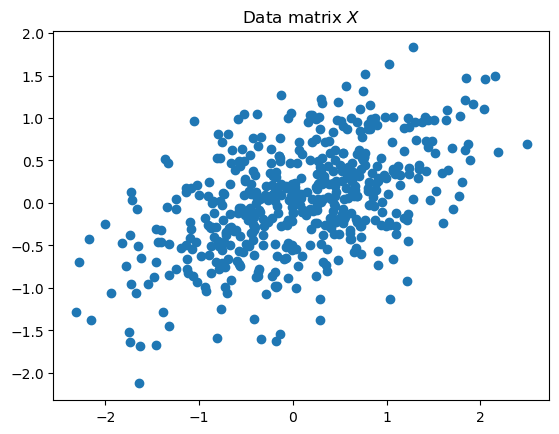

Estimate of the covariance matrix:
 [[0.75693565 0.28186631]
 [0.28186631 0.39288421]]
***
Estimate of the mean vector:
 [0.06228968 0.01937939]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3],
                     [.3, .4]])

print('Real covariance matrix:\n', real_cov)

rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0], cov=real_cov, size=500)
cov = EmpiricalCovariance().fit(X)

plt.title('Data matrix $X$')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

print('Estimate of the covariance matrix:\n', cov.covariance_)
print('***')
print('Estimate of the mean vector:\n', cov.location_)

## Principal Component Analysis

Principal Components Analysis (PCA) is the most popular algorithm to perform dimensionality reduction in a unsupervised way.

Mathematically, PCA is defined as an orthogonal linear transformation that represents the data points in $X$ in a new coordinate system, so that the largest variance resides in the first coordinate (called the first principal component), the second largest variance resides in the second coordinate, and so on.

### Projection error

The new coordinate system is produced by PCA in such a way as to minimize the **projection error** of the data on the smaller dimensional space.

Mathematically, the projection error corresponds to the sum of the squares of the distances between each data point and the surface corresponding to the smaller dimensional space for which the points must be projected.

To intuitively  understand the concept of projection error, consider the following 2D data set:

![alt text](https://i.stack.imgur.com/jPw90.png)

The following animation ([source](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)) presents different lines of projections on which the original dataset (in 2D) can be prjected. Each of these projection lines corresponds to a 1D dimensional space. For each projection line, each of the points located on it (points in red) corresponds to some point in the original space (points in blue).

![alt text](https://i.stack.imgur.com/Q7HIP.gif)

For a given projection line $R$, if we compute the square of the distance between each red point and the corresponding blue point (i.e., the lengths of the straight line segments in red) and add all these distances, we obtain the projection error related to $R$. In this example, note that

* each projection line has its corresponding projection error.
* each of these lines defines a new space determined by a vector (which defines the direction of the line).
* the line that preserves the maximum data variance is the same that corresponds to the minimum value for the projection error.

The goal of PCA is to find the direction(s) of projection corresponding to the minimum possible projection error.

### Formalization

* (special case) 2 dimensions $\rightarrow$ 1 dimension: find a direction (i.e., a vector) on which to project the data, in such a way as to minimize the projection error.
* (general case) $n$ dimensions $\rightarrow$ $k$ dimensions: find $k$ directions (i.e., $k$ vectors) on which to project the data, in order to minimize the projection error.

### Pre-processing

Before applying the PCA, it is necessary to centralize the data matrix $X$.

Furthermore, if the scales of the various attributes in $ X $ are very different, *feature scaling* should be performed.

### Linear Transformations

Fundamental to understading PCA is the concept of linear transformations. Watch the video below to get a grasp on this subject.

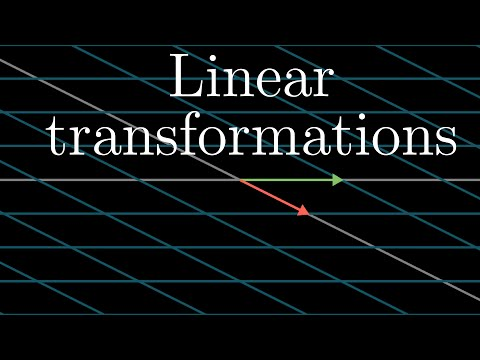

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('kYB8IZa5AuE')

### Singular Values Decomposition ​​(SVD)

By now, you should understand that linear tranformations are special functions that map one vector to another. You should also understand that a linear transformation can always be represented by a matrix in such a way that, when we multiply this matrix by a vector $v$ the resulting vector $u$ can be interpreted as transformation applied to $v$.

PCA uses a matrix decomposition technique called Singular Vector Decomposition (SVD for short). Formally, SVD is a way to factor a composite linear transformation represented by a single matrix $M$ into its component matrices. In particular, by using SVD, a matrix $M$ representing a composite linear transformatrion can be factorized: 

$$
M = \mathbf{U \times \Sigma \times V^T}
$$

The matrices resulting from the SVD factorization have specific properties. In particular, if $M$ is $r \times c$, then:
- $U$ is $r \times r$; its columns are the eigenvectors of $M \times M^T$ in decreasing order of the corresponding eigenvalues.
- $\Sigma$ is $r \times c$ (this is a [diagonal matrix](en.wikipedia.org/wiki/Diagonal_matrix); furthermore, the diagonal entries of $\Sigma$ appear in
decreasing order.)
- $V$ is $c \times c$; its columns are the eigenvectors of $M^T \times M$ in decreasing order of the corresponding eigenvalues.

Applying $M$ to a vector $\mathbf{v}$ is equivalent to applying the components matrices in sequence:

$$
M \times \mathbf{v}\equiv U \times (\Sigma \times (V^T \times \mathbf{v}))
$$

The SVD decomposition of a matrix can be computed through the [power iteration method](https://en.wikipedia.org/wiki/Power_iteration), although there are more computationaly efficient approaches.

Intuitively, SVD produces a decomposition of the original matrix $M$ into matrices that either rotate or resize the input vectors. The following animation ([source](https://en.wikipedia.org/wiki/Singular_value_decomposition)) illustrates the mechanics of SVD. Two vectors are depicted (in yellow and red). You should see that the change in these vectors resulting from applying $M$ is the same obtained by applying $V$, $\Sigma$ and $U$ (in this order) on them.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Singular_value_decomposition.gif/280px-Singular_value_decomposition.gif)

See also the following image, which provides a static view of the animation above.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/800px-Singular-Value-Decomposition.svg.png)

NB: be aware of the difference in notation used in the above animation in comparison to the one used in this notebook. In particular, $\Sigma$ is used in this notebook to denote the covariance matrix of a data matrix.

### Algorithm steps

Consider using PCA to reduce the dimensionality of the (already centralized) $X$ data matrix from $n$ to $k$. To do this, the following steps should be performed:

1. Compute $\Sigma$, the covariance matrix of $X$:
$$
\Sigma =\frac{1}{m-1} X^T \, X
$$

2. Compute the SVD decomposition of $\Sigma$: 
$$
[U, S, V] := \text{svd}(\Sigma)
$$

From this decomposition (step 2), the relevant matrix for PCA is ​​$U \in \Re^{n \times n}$. The columns of $U$ form an orthonormal basis for $\Re^n$. Also, the first $k$ columns of $U$ will correspond to the so called *principal components* of PCA. 

$$
U = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(n)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}
$$

After identifying the principal components, it is possible to reduce the dimensionality of the original dataset from $n$ to $k$ dimensions, projecting it on the hyperplane defined by the first $k$ principal components. Selecting this hyperplane ensures that the projection will preserve the greatest possible variance. Consider the matrix $U_{redux}$ obtained from $U$, such that $U_{redux}$ contains the first $k$ columns of $U$:

$$
U_{redux} = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(k)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}
$$

To map the vector $\mathbf{x}^{(i)} \in \Re^n$ to the vector $\mathbf{z}^{(i)} \in \Re^k$, PCA computes:
$$
\mathbf{z}^{(i)} = \begin{bmatrix}
\vert 	& \vert 	& 			& \vert \\ 
\mathbf{u}^{(1)} & \mathbf{u}^{(2)} & \dots & \mathbf{u}^{(k)}\\ 
\vert 	& \vert 	& 			& \vert 
\end{bmatrix}^T \, \mathbf{x}^{(i)}
$$




The following is a sanity check on the dimensions of the matrices and vectors involved in the dimensionality reduction:

\begin{align*}
(U_{redux})^T          & \times \mathbf{x}^{(i)} & = & \, U_{redux}^T \times \mathbf{x}^{(i)} &=& \, \mathbf{z}^{(i)} \\
(n \times k)^T & \times (n \times 1)     & = & \, (k \times n) \times (n \times 1) &=& \, (k \times 1)
\end{align*}


### PCA on Scikit-Learn

In Scikit-Learn, the class [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implements PCA. This class project point in the the input data matrix $X$ to a smaller dimensional space. The data matrix is ​​centralized, but its attributes are not resized, before applying the SVD decomposition.

```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
```

Instead of specifying the number of principal components to be preserved, it is possible to define `n_components` as a number between 0.0 and 1.0, to indicate the proportion of variance to be maintained:

```
from sklearn.decomposition import PCA
pca = PCA(ncomponents = 0.95)
X_reduced = pca.fit_transform(X)
```

After applying the transformer to the $X$, the principal components are stored in the variable `components_`. This variable contains PCs as horizontal vectors. So, for example, the first major component is the same as `pca.components_.T [:, 0])`.

As an example of using the class [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), consider the following two-dimensional toy dataset.

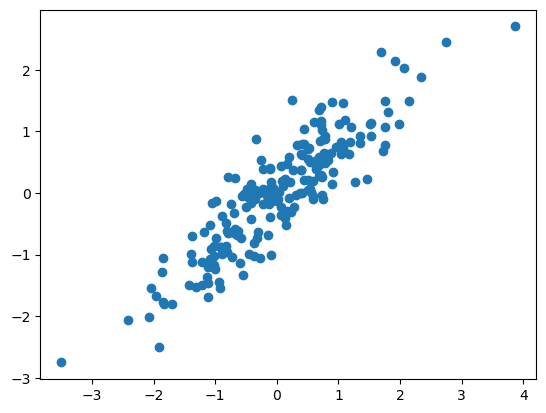

In [6]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By visually inspecting the plot presented above, you should notice that there exists a positive correlation between the two variables: greater values of one of the variables correspond to greater values of the other variable, and vice-versa. We can confirm this by inspecting the empirical covariance matrix. See the code cell below.

In [7]:
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X)
print(cov.covariance_)

[[1.05064217 0.85440225]
 [0.85440225 0.87143631]]


The following code instantiates the PCA class of Scikit-Learn and invokes the `fit` method to compute the principal components for $X$.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [9]:
print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


In [10]:
print(pca.explained_variance_)

[1.82927343 0.10246373]


In [11]:
s = 0.7625315 + 0.0184779
print(0.7625315/s)
print(0.0184779/s)

0.9763410017856379
0.023658998214362077


We can have a greater intuition about the meaning of the principal components through the following visualization.

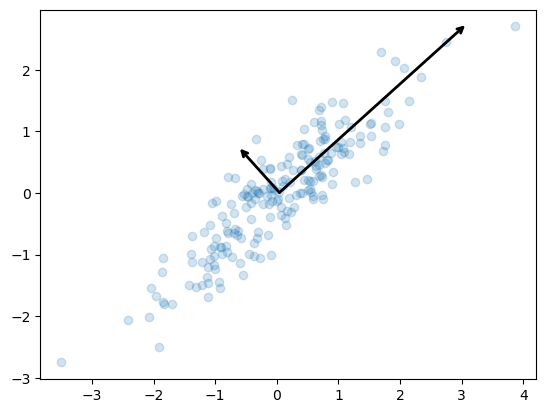

In [12]:
# fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In the visualization presented above, the vectors represent the main axes of the data in the new coordinate system determined by PCA. These vectors are produced from the columns of the $U$ matrix coming from SVD. In addition, the length of each depicted vector is an indication of how "important" the corresponding axis is in the description of the data distribution. More precisely, it is a measure of the variance of the data when projected for that axis.

### PCA applications

* Reduction of memory required for data storage.

* Acceleration of learning algorithms: PCA can be applied to reduce the dimensionality of a data matrix before applying some learning algorithm. The resulting projected data matrix will usually be processed faster due to the lower number of features.

* Preview: PCA can be used as an exploratory data analysis tool. In such context, we can apply PCA to reduce a dataset to 2 or 3 dimensions, in order to visually inspect its points and get some insight.

### Finding the intrinsic dimension

An important procedure when using PCA is to estimate how many principal components are needed to adequately describe the data. This quantity is called [intrinsic dimension](https://en.wikipedia.org/wiki/Intrinsic_dimension) of the data set.

> "The intrinsic dimension for a data set can be thought of as the number of variables needed in a minimal representation of the data." --Wikipedia

The intrinsic dimension can be determined by looking at the accumulated explained variance rate as a function of the number of components.

The following example uses the data set [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) to illustrate this process ([source](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)).

(1797, 64)
(1797, 2)


/var/folders/91/qbr5td611v3f7_c_dz8zmxmm0000gn/T/ipykernel_55052/2787941203.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues', 10))


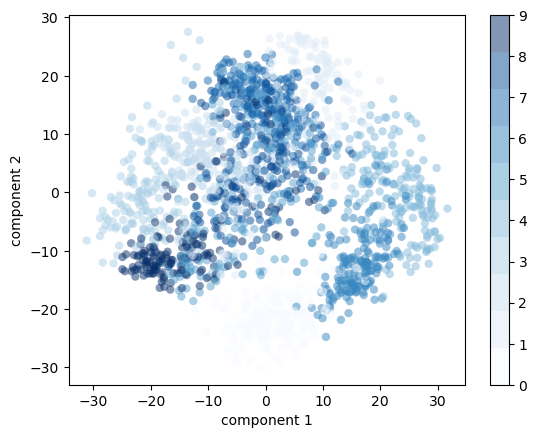

In [13]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

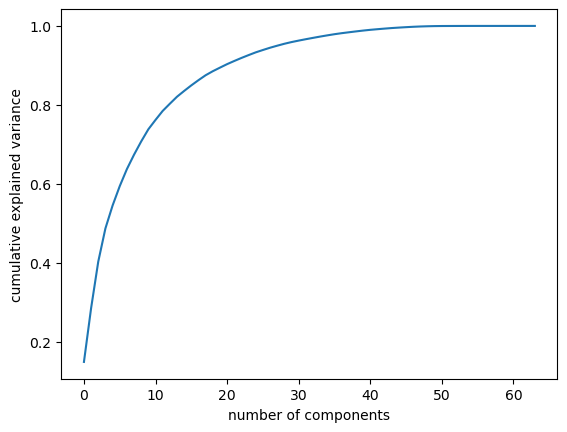

In [14]:
import numpy as np
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [15]:
print(pca.explained_variance_)

# knee method

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]


Through the graph above, we see that the two-dimensional projection loses a lot of information (measured by the explained variance) and that we need about 20 components to retain around 90% of the variance. Looking at this graph for a high-dimensional dataset can help you understand the level of redundancy present in the data set.

### PCA - practical considerations

* At first, we could erroneously consider adding PCA unconditionally to the usual ML task implementation workflow. A more appropriate approach is, before applying PCA, to try the ML algorithm(s) on the original data set. If the results are unsatisfactory, consider applying PCA.

* To avoid [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)), the projection must be constructed using only the training set. After building this mapping, it can be applied to the validation and test sets.

* A weakness of PCA is that it tends to be heavily affected by *outliers*. Therefore, it is worth making a previous exploratory analysis to identify whether there are extreme values ​​in the data set.

* Scaling attributes is important for the correct functioning of the PCA. (See also [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py))

### Case study

In this section, we investigate a PCA application case study on the Iris data set (4D) to project it on the plane (2D space) defined by the first two principal components, preserving a large part of the data set variance.

Load the data set into a Pandas DataFrame

In [16]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [17]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Resize the data

In [18]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# data matrix (only features)
X = df.loc[:, features].values

# target vector
y = df.loc[:,['target']].values

# Rescaling the features
X = StandardScaler().fit_transform(X)

Invokes PCA to project the dataset to two dimensions

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Determines the intrinsic dimension of the data

[2.93035378 0.92740362 0.14834223 0.02074601]


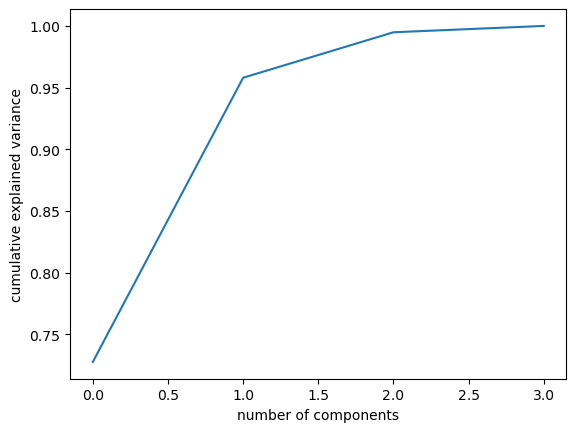

In [20]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

The next code cell plots the resulting two-dimensional data. Notice in the graph below that the classes appear well separated from each other.

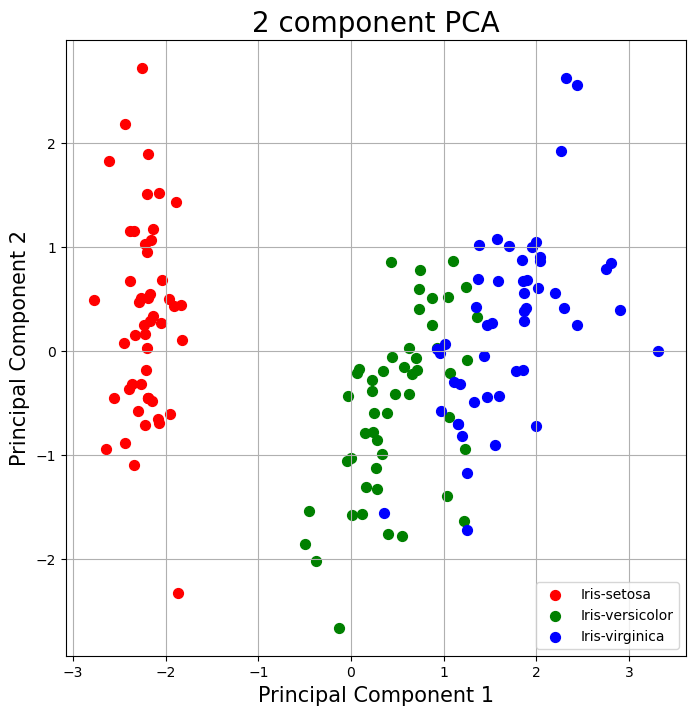

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The `explained_variance_ratio_` field of the PCA object tells you how much information (variance) can be attributed to each of the main components. When inspecting the `explained_variance_ratio_` vector, we can see that the first main component contains 72.77% of the variance, and the second main component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [23]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

You can find out how many components PCA chooses after adjusting the model using the `pca.n_components_` field.

In [24]:
pca.n_components_

4

### Variants of PCA

Some variants of PCA have been developed. Scikit-Learn contains some implementations of these variants, including the following:

* `IncrementalPCA`. One problem with the classic PCA implementation is that it requires the entire training set to fit in memory for the SVD algorithm to run. The IncrementalPCA class can divide the training set into mini-batches and feed the decomposition procedure one mini-batch at a time. This is useful for large training sets.

* `RandomizedPCA`. This implementation uses a non-deterministic method to quickly approximate the first few major components in very large data. `RandomizedPCA` implements a stochastic algorithm that quickly finds an approximation of the first $k$ main components. Its computational complexity is $O(m \times k^2) + O(k^3)$. In comparison to the $O(m \times n^2) + O(n^3)$ complexity of the original version, this stochastic version is significantly faster when $k$ is much less than $n$.

The following code divides the MNIST data set into 100 mini-batches (using NumPy's `array_split()` function) and supplies them to the IncrementalPCA class to reduce the dimensionality of the MNIST data set to 154 dimensions. Note that you must call the `partial_fit()` method with each mini-batch instead of the `fit()` method with the entire training set.

In [25]:
from sklearn.decomposition import IncrementalPCA
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X_mnist.shape)

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
        inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X_mnist)

print(X_mnist_reduced.shape)

(70000, 784)


/Users/ebezerra/miniconda3/envs/cic1205/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(70000, 154)


The following example illustrates the use of the class `RandomizedPCA`.

In [26]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)
print(X_mnist_reduced.shape)

(70000, 154)
